<a href="https://colab.research.google.com/github/desabuh/elliptic_curves_cryptography_plots/blob/master/plot_for_eliptic_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
from ipywidgets import interact
from sympy import nsolve

TOTIENT FUNCTION


In [ ]:
def gcd(a, b):
  if b==0:
    return a
  return gcd(b, a % b)

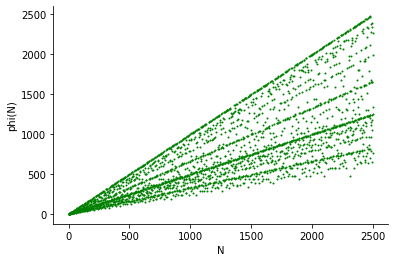

In [ ]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("N")
plt.ylabel("phi(N)")
plt.scatter([*range(1,2500)], [sum(gcd(n, i) == 1 for i in range(1,n)) for n in range(1, 2500)], s = 1, c='green');
plt.show()

GENERAL TO WEISTRASS FORM


In [5]:
@interact(a = (-10,10,0.1), b=(-10,10,0.1), c=(-10,10,0.1), d=(-10,10,0.1), e=(-10,10,0.1))
def ell_curve(a, b, c, d, e):
  mx2, mx1 = np.ogrid[-10:10:0.1,-15:15:0.1]
  def evaluate_general(x,y):
    return np.power(y,2) + a*x*y + b*y - np.power(x, 3) - c * np.power(x,2) - d*x - e
  def transform_coord(x,y):
    return x - ((a**2 + 4*c) / 12), y - (a / 2)*x + ((a**3 + 4*a*c - 12 * b) / 24)
  def evaluate_normal(x,y):
    x, y = transform_coord(x,y)
    return np.power(y,2) - np.power(x,3) - d*x - e

 
  plt.contour(mx1.ravel(), mx2.ravel(), evaluate_general(mx1, mx2), [0], colors="blue")
  plt.contour(mx1.ravel(), mx2.ravel(), evaluate_normal(mx1, mx2), [0], colors="red")
  plt.show()

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

FINITE CURVE

In [ ]:
def display_finite_curve(a, b, N):
  def is_point(x, y, a, b, N):
    return (y**2) % N == (x**3+ a*x + b) % N
  points = [(x,y) for x in range(N) for y in range(N) if is_point(x,y,a,b,N)]
  plt.text(-5,-5,s = "p = {}\n a = {}\n b= {}".format(N,a,b),c = "black",bbox={'facecolor': 'green', 'alpha': 0.5})
  plt.scatter(list(zip(*points))[0], list(zip(*points))[1], s=10)

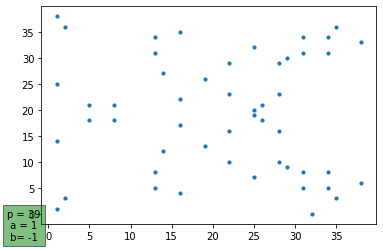

In [ ]:
display_finite_curve(1, -1, 39)